<a href="https://colab.research.google.com/github/IvanMedvedev11/Classwork_matrix/blob/main/Best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
# Считываем файлы
df_train = pd.read_csv('/content/train_success.csv', sep=',')
df_test = pd.read_csv('/content/test_success.csv', sep=',')
df_train

,Unnamed: 0,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,...,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,Статус студента
0,0,1,8,5,14,1,1,1,1,13,...,0,1,0,0,21,0,7.6,2.6,0.32,Выпуск с задержкой
1,1,1,1,1,15,1,1,1,26,25,...,0,1,1,1,19,0,10.8,1.4,1.74,Выпуск
2,2,1,8,6,12,1,1,1,1,13,...,0,1,0,0,19,0,13.9,-0.3,0.79,Отчисление
3,3,2,13,1,3,0,1,1,22,22,...,0,1,0,0,45,0,9.4,-0.8,-3.12,Отчисление
4,4,1,8,1,2,1,1,1,1,1,...,0,0,1,0,19,0,10.8,1.4,1.74,Отчисление
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,3454,1,1,3,10,1,1,1,26,25,...,0,1,0,1,19,0,13.9,-0.3,0.79,Выпуск
3455,3455,1,1,1,5,1,1,1,3,1,...,0,1,0,0,20,0,15.5,2.8,-4.06,Выпуск
3456,3456,1,1,1,9,1,1,1,13,25,...,0,1,0,1,19,0,7.6,2.6,0.32,Выпуск с задержкой
3457,3457,1,8,4,15,1,1,1,25,13,...,0,0,0,0,18,0,10.8,1.4,1.74,Выпуск


In [3]:
# Заменяем категориальные значения на численные
df_train['Статус студента'] = df_train['Статус студента'].replace('Выпуск', 2)
df_train['Статус студента'] = df_train['Статус студента'].replace('Выпуск с задержкой', 1)
df_train['Статус студента'] = df_train['Статус студента'].replace('Отчисление', 0)


<ipython-input-3-4727a9297310>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Статус студента'] = df_train['Статус студента'].replace('Отчисление', 0)


In [4]:
# Оставляем только колонки с категориальными факторами
columns_for_graph = df_train.drop(['Возраст на момент поступления', 'Уровень безработицы', 'Уровень инфляции', 'ВВП на душу населения'], axis=1)

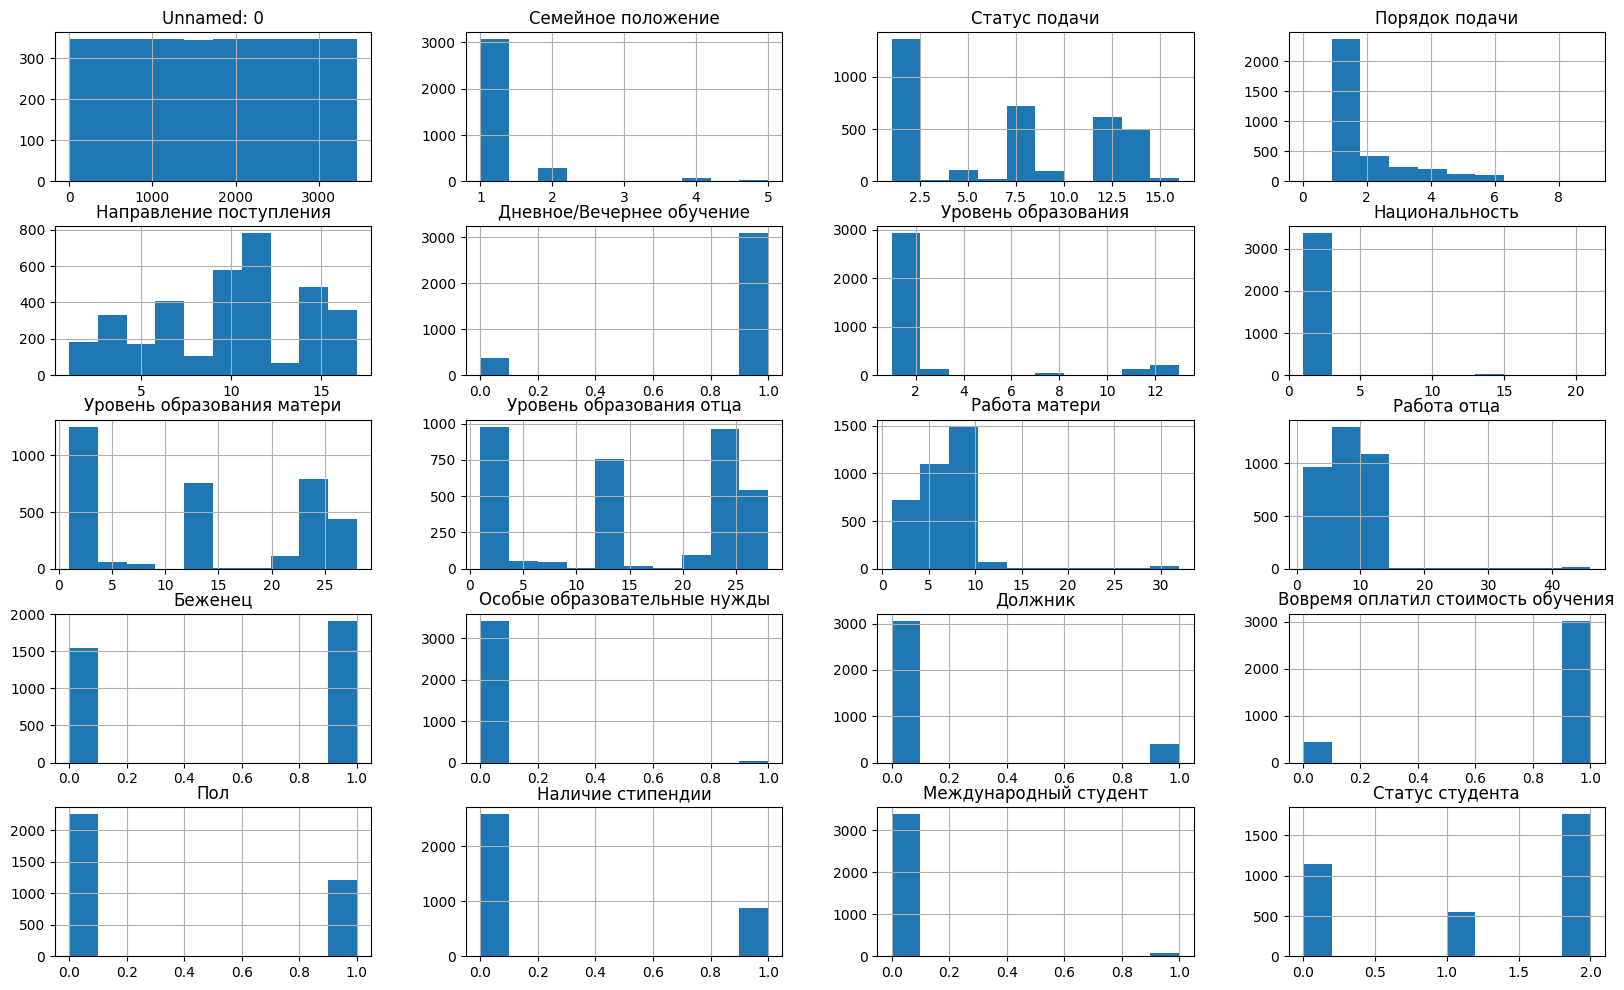

In [5]:
# Смотрим график распределения классов
features = columns_for_graph.columns

_ = columns_for_graph[features].hist(figsize=(20,12))

In [6]:
df_train.corr()

,Unnamed: 0,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,...,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,Статус студента
Unnamed: 0,1.000000,-0.018445,-0.030342,-0.007963,-0.009231,0.021945,-0.019282,0.001352,0.015265,-0.008562,...,0.008504,-0.013263,-0.005979,-0.008215,0.000896,0.003297,0.015087,-0.000406,-0.010465,0.013425
Семейное положение,-0.018445,1.000000,0.234336,-0.134009,0.016692,-0.279021,0.116474,-0.018515,0.192358,0.122276,...,0.041404,-0.097662,-0.006186,-0.067487,0.530510,-0.025054,-0.025915,0.005847,-0.028505,-0.087631
Статус подачи,-0.030342,0.234336,1.000000,-0.235340,-0.087111,-0.276329,0.453653,-0.000076,0.108583,0.086359,...,0.119620,-0.136957,0.146185,-0.140562,0.460498,0.004404,0.092906,-0.024093,-0.024372,-0.219682
Порядок подачи,-0.007963,-0.134009,-0.235340,1.000000,0.120495,0.152272,-0.198135,-0.025646,-0.057506,-0.046994,...,-0.074855,0.049047,-0.094317,0.067499,-0.266680,-0.023262,-0.100715,-0.018249,0.035051,0.095766
Направление поступления,-0.009231,0.016692,-0.087111,0.120495,1.000000,-0.055533,-0.184966,0.000748,0.054985,0.039522,...,-0.064233,0.029034,-0.099062,0.049298,-0.046178,-0.000253,-0.054281,0.019963,-0.010320,0.012461
Дневное/Вечернее обучение,0.021945,-0.279021,-0.276329,0.152272,-0.055533,1.000000,-0.096597,0.026803,-0.201231,-0.140486,...,0.007258,0.048518,-0.009802,0.101265,-0.460791,0.030877,0.057854,-0.012828,0.022348,0.067638
Уровень образования,-0.019282,0.116474,0.453653,-0.198135,-0.184966,-0.096597,1.000000,-0.045266,0.027731,0.026982,...,0.130392,-0.116338,0.106827,-0.071311,0.244471,-0.047092,0.101806,-0.052880,0.031376,-0.096003
Национальность,0.001352,-0.018515,-0.000076,-0.025646,0.000748,0.026803,-0.045266,1.000000,-0.034885,-0.086766,...,0.081517,-0.043282,-0.029481,-0.011797,-0.002728,0.911704,-0.014528,-0.000149,0.042303,-0.010721
Уровень образования матери,0.015265,0.192358,0.108583,-0.057506,0.054985,-0.201231,0.027731,-0.034885,1.000000,0.537873,...,0.014096,-0.014218,-0.067403,0.047313,0.295927,-0.027709,-0.104613,0.064044,-0.092164,-0.035798
Уровень образования отца,-0.008562,0.122276,0.086359,-0.046994,0.039522,-0.140486,0.026982,-0.086766,0.537873,1.000000,...,-0.019086,-0.003060,-0.073699,0.110899,0.198726,-0.082199,-0.065055,0.068555,-0.090234,0.005574


Как можно заметить, самое неравномерное распределение в признаках "Международный студент", "Национальность" и "Особые образовательные нужды", поэтому эти признаки мы убираем. Также был убран признак "Unnamed: 0", так как это просто номера строк.
Не были убраны данные по корреляции, потому что без них модель хуже работает

In [7]:
# Подготавливаем факторы
X = df_train.drop(['Статус студента'], axis=1)

In [8]:
# Правильные ответы
y = df_train['Статус студента']

In [9]:
# Разбиваем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Преобразуем данные в тензоры для обучения модели
X_train = np.array(X_train)
X_train = torch.from_numpy(X_train).float()
X_test = np.array(X_test)
X_test = torch.from_numpy(X_test).float()
y_train = np.array(y_train)
y_train = torch.from_numpy(y_train).long()
y_test = np.array(y_test)
y_test = torch.from_numpy(y_test).long()

In [11]:
class ClassificationNet(torch.nn.Module): #создаём класс модели для классификации
  def __init__(self, n_neurons_hidden):
    super(ClassificationNet, self).__init__()
    # Скрытый слой нейронной сети
    self.fc1 = torch.nn.Linear(23, n_neurons_hidden)
    self.act1 = torch.nn.ReLU() # Функция активации
    self.fc2 = torch.nn.Linear(n_neurons_hidden, 3)
    # Выходной слой
    self.sm = torch.nn.Softmax(dim=1) #Преобразуем данные в вероятности принадлежности одному из классов
  def forward(self, x):
    # Получаем выход из нейронной сети
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
  def inference(self, x):
    # Получаем вероятности принадлежности к классу
    x = self.forward(x)
    x = self.sm(x)
    return x
# Создаём модель с 22 нейронами в скрытом слое
classification_net = ClassificationNet(48)

В качестве бинарного классификатора используется нейронная сеть, так как она может находить нелинейные зависимости в данных, в то время как логистическая регрессия может находить только линейные зависимости, а дерево принятия решений склонно к переобучению. Пробовалось несколько слоёв, разное количество нейронов в слое и разные функции активации, но лучший результат дала нейронная сеть с одним скрытым слоем, 22 нейронами в нём и с функцией актиации ReLU

In [12]:
# Функция потерь - Бинарная кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Градиентный спуск Adam с шагом обучения 0,01
optimizer = torch.optim.Rprop(classification_net.parameters(), lr=0.01)

Испытывались разные версии градиентного спуска, например SGD, RProp, разные шаги обучения, но лучший результат дал градиентный спуск Adam с lr = 0.01

In [13]:
for epochs in range(10000):
      optimizer.zero_grad()

      preds = classification_net.forward(X_train)

      loss_value = loss(preds, y_train)
      loss_value.backward()

      optimizer.step()

      if epochs % 100 == 0:
      # Каждые 100 эпох получаем предсказания для тестовой выборки
        test_preds = classification_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1) #Выбираем класс с максимальной вероятностью
        print(f1_score(test_preds, y_test, average='macro')) #Получаем точность по метрике f1-score(macro)
        if f1_score(test_preds, y_test, average='macro') > 0.54: #Если результат достаточно высок прерываем обучение
          break

0.235501668223296
0.4705003744073659
0.48087558844757566
0.4776519349132668
0.4774391623307372
0.47662444130000226
0.4749194114619801
0.47233456033670446
0.47136987219907595
0.47545589817753875
0.47545589817753875
0.47790498224336736
0.4776952506953551
0.4764045989852441
0.4764045989852441
0.47544191974216465
0.4764045989852441
0.4764045989852441
0.47736862293824317
0.47683903831790353
0.4758756831398176
0.4758756831398176
0.4747121966034848
0.4747121966034848


KeyboardInterrupt: 

Используются батчи, чтобы получать усреднённое значение функции потерь и не тратить так много времни на обучение, размер батча 10, чтобы батчей было больше и модель больше обучалась

In [ ]:
# Функция для предсказаний
def predict(net, x):
    y_pred = net.forward(x)
    y_pred = y_pred.argmax(dim=1)
    return y_pred

In [ ]:
# Подготавливаем тестовый набор данных
df_x = df_test.drop(['Статус студента'], axis=1)
df_x = np.array(df_x)
df_x = torch.from_numpy(df_x).float()


In [ ]:
# Делаем предсказание и вставляем в тестовый набор данных
y_pred = predict(classification_net, df_x)
df_test['Статус студента'] = y_pred.detach().numpy()
df_test['Статус студента'] = df_test['Статус студента'].replace(0, 'Отчисление')
df_test['Статус студента'] = df_test['Статус студента'].replace(1, 'Выпуск с задержкой')
df_test['Статус студента'] = df_test['Статус студента'].replace(2, 'Выпуск')

In [ ]:
# Преобразуем данные в файл
df_test.sort_index().to_csv("submit.csv")